In [3]:
#importing all the necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import linear_model
import re
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as mlt

In [4]:
#importing the dataset
df= pd.read_csv('Cancer_dm.csv')

In [5]:
#view the top 5 data
df.head()

,Patient ID #,Sample ID #,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),...,sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result
0,CRC 455,CRC 455 PLS 1,Colorectum,I,1583.45,5598.50,3621.04,5.09,19.08,*16.452,...,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82,0.938,Positive
1,CRC 456,CRC 456 PLS 1,Colorectum,I,*715.308,20936.35,2772.96,7.27,10.04,40.91,...,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09,0.925,Positive
2,CRC 457,CRC 457 PLS 1,Colorectum,II,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,...,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60,0.852,Negative
3,CRC 458,CRC 458 PLS 1,Colorectum,II,*715.308,1604.34,2029.96,5.39,8.31,*16.452,...,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73,0.618,Negative
4,CRC 459,CRC 459 PLS 1,Colorectum,II,801.3,2087.57,2069.17,*4.854,11.73,*16.452,...,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20,0.318,Negative


In [6]:
#check for null values
df.isna().sum().sum()

880

In [7]:
#remove the patients having normal tumour type
df = df[df.iloc[:,2] != 'Normal']

In [8]:
df.isna().sum().sum()

1

In [9]:
#view feature names
df.columns

Index(['Patient ID #', 'Sample ID #', 'Tumor type', 'AJCC Stage',
       'AFP (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'AXL (pg/ml)', 'CA-125 (U/ml)',
       'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CD44 (ng/ml)', 'CEA (pg/ml)',
       'CYFRA 21-1 (pg/ml)', 'DKK1 (ng/ml)', 'Endoglin (pg/ml)',
       'FGF2 (pg/ml)', 'Follistatin (pg/ml)', 'Galectin-3 (ng/ml)',
       'G-CSF (pg/ml)', 'GDF15 (ng/ml)', 'HE4 (pg/ml)', 'HGF (pg/ml)',
       'IL-6 (pg/ml)', 'IL-8 (pg/ml)', 'Kallikrein-6 (pg/ml)',
       'Leptin (pg/ml)', 'Mesothelin (ng/ml)', 'Midkine (pg/ml)',
       'Myeloperoxidase (ng/ml)', 'NSE (ng/ml)', 'OPG (ng/ml)', 'OPN (pg/ml)',
       'PAR (pg/ml)', 'Prolactin (pg/ml)', 'sEGFR (pg/ml)', 'sFas (pg/ml)',
       'SHBG (nM)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'sPECAM-1 (pg/ml)',
       'TGFa (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)',
       'TIMP-2 (pg/ml)', 'CancerSEEK Logistic Regression Score',
       'CancerSEEK Test Result'],
      dtype='object')

In [10]:
#rename the features
df.rename(columns = {'AFP (pg/ml)':'AFP_(pg/ml)', 'CA-125 (U/ml)':'CA-125_(U/ml)',
                              'CA 15-3 (U/ml)':'CA_15-3_(U/ml)','CA19-9 (U/ml)':'CA19-9_(U/ml)',
                              'CEA (pg/ml)':'CEA_(pg/ml)','HGF (pg/ml)':'HGF_(pg/ml)',
                             'OPN (pg/ml)':'OPN_(pg/ml)','Prolactin (pg/ml)':'Prolactin_(pg/ml)','TIMP-1 (pg/ml)':'TIMP-1_(pg/ml)',
                     'Tumor type':'Tumor_type','Patient ID #':'Patient_ID','Sample ID #':'Sample_ID',
                     'CancerSEEK Logistic Regression Score':'CancerSEEK_Logistic_Regression_Score',
                     'CancerSEEK Test Result':'CancerSEEK_Test_Result','AJCC Stage':'AJCC_Stage'}, inplace = True)

In [11]:
df.isna().sum().sum()

1

In [12]:
#add the required features in a new dataframe
df1 = df[["Tumor_type","AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)","CancerSEEK_Test_Result"]]

In [13]:
df1.head()

,Tumor_type,AFP_(pg/ml),CA-125_(U/ml),CA_15-3_(U/ml),CA19-9_(U/ml),CEA_(pg/ml),HGF_(pg/ml),OPN_(pg/ml),Prolactin_(pg/ml),TIMP-1_(pg/ml),CancerSEEK_Test_Result
0,Colorectum,1583.45,5.09,19.08,*16.452,540.1,377.26,56516.58,11606.6,56428.71,Positive
1,Colorectum,*715.308,7.27,10.04,40.91,"5,902.4",659.68,61001.39,14374.99,73940.49,Positive
2,Colorectum,4365.53,*4.854,16.96,*16.452,973.8,329.07,88896.24,38375,22797.28,Negative
3,Colorectum,*715.308,5.39,8.31,*16.452,"2,027.5",266.66,42549.61,12072.51,20441.19,Negative
4,Colorectum,801.3,*4.854,11.73,*16.452,614.5,370.88,24274.11,23718.17,56288.51,Negative


In [14]:
#no null values
df1.isna().sum().sum()

0

In [15]:
#remove any str pattern present in the numerical column
df1['AFP_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["AFP_(pg/ml)"]]
df1['CA-125_(U/ml)']=[re.sub("[*]", "", x).strip() for x in df1["CA-125_(U/ml)"]]
df1['CA_15-3_(U/ml)']=[re.sub("[*]", "", x).strip() for x in df1["CA_15-3_(U/ml)"]]
df1['CA19-9_(U/ml)']=[re.sub("[*]", "", x).strip() for x in df1["CA19-9_(U/ml)"]]
df1['CEA_(pg/ml)']=[re.sub("[*,]", "", x).strip() for x in df1["CEA_(pg/ml)"]]
df1['HGF_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["HGF_(pg/ml)"]]
df1['OPN_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["OPN_(pg/ml)"]]
df1['Prolactin_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["Prolactin_(pg/ml)"]]
df1['TIMP-1_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["TIMP-1_(pg/ml)"]]

C:\Users\sriku\AppData\Local\Temp/ipykernel_14888/2051290352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AFP_(pg/ml)']=[re.sub("[*]", "", x).strip() for x in df1["AFP_(pg/ml)"]]
C:\Users\sriku\AppData\Local\Temp/ipykernel_14888/2051290352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CA-125_(U/ml)']=[re.sub("[*]", "", x).strip() for x in df1["CA-125_(U/ml)"]]
C:\Users\sriku\AppData\Local\Temp/ipykernel_14888/2051290352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [16]:
df1

,Tumor_type,AFP_(pg/ml),CA-125_(U/ml),CA_15-3_(U/ml),CA19-9_(U/ml),CEA_(pg/ml),HGF_(pg/ml),OPN_(pg/ml),Prolactin_(pg/ml),TIMP-1_(pg/ml),CancerSEEK_Test_Result
0,Colorectum,1583.45,5.09,19.08,16.452,540.1,377.26,56516.58,11606.6,56428.71,Positive
1,Colorectum,715.308,7.27,10.04,40.91,5902.4,659.68,61001.39,14374.99,73940.49,Positive
2,Colorectum,4365.53,4.854,16.96,16.452,973.8,329.07,88896.24,38375,22797.28,Negative
3,Colorectum,715.308,5.39,8.31,16.452,2027.5,266.66,42549.61,12072.51,20441.19,Negative
4,Colorectum,801.3,4.854,11.73,16.452,614.5,370.88,24274.11,23718.17,56288.51,Negative
...,...,...,...,...,...,...,...,...,...,...,...
1812,Ovary,879.498,24.82,10.30,42.39,914.00,284.34,38603.84,58266.97,167799.61,Positive
1813,Ovary,1337.33,5.58,9.80,16.44,1179.5,374.03,29994.01,187828.79,123443.76,Positive
1814,Ovary,879.498,30.48,8.48,16.44,443.01,309.22,93601.15,241440.02,104070.89,Positive
1815,Ovary,879.498,1469.45,23.74,62.26,443.01,1153.7,145116.62,140145.7,110579.24,Positive


In [17]:
df1.dtypes

Tumor_type                object
AFP_(pg/ml)               object
CA-125_(U/ml)             object
CA_15-3_(U/ml)            object
CA19-9_(U/ml)             object
CEA_(pg/ml)               object
HGF_(pg/ml)               object
OPN_(pg/ml)               object
Prolactin_(pg/ml)         object
TIMP-1_(pg/ml)            object
CancerSEEK_Test_Result    object
dtype: object

In [18]:
#change the object dtype to float dtype
df1[["AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)"]]=df1[["AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)"]].astype(float)

C:\Users\sriku\AppData\Local\Temp/ipykernel_14888/1543430720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)"]]=df1[["AFP_(pg/ml)", "CA-125_(U/ml)","CA_15-3_(U/ml)","CA19-9_(U/ml)","CEA_(pg/ml)","HGF_(pg/ml)","OPN_(pg/ml)","Prolactin_(pg/ml)","TIMP-1_(pg/ml)"]].astype(float)


In [19]:
df1.dtypes

Tumor_type                 object
AFP_(pg/ml)               float64
CA-125_(U/ml)             float64
CA_15-3_(U/ml)            float64
CA19-9_(U/ml)             float64
CEA_(pg/ml)               float64
HGF_(pg/ml)               float64
OPN_(pg/ml)               float64
Prolactin_(pg/ml)         float64
TIMP-1_(pg/ml)            float64
CancerSEEK_Test_Result     object
dtype: object

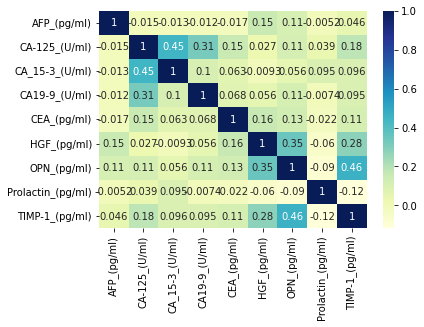

In [20]:
#correlation plot to view how the features are correlated
df1.corr()
  
# plotting correlation heatmap
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mlt.show()

In [23]:
# Import label encoder


# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df1['CancerSEEK_Test_Result']= label_encoder.fit_transform(df1['CancerSEEK_Test_Result'])

df1['CancerSEEK_Test_Result'].unique()
a=[df1.CancerSEEK_Test_Result.value_counts()]
a

C:\Users\sriku\AppData\Local\Temp/ipykernel_14888/1530963627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CancerSEEK_Test_Result']= label_encoder.fit_transform(df1['CancerSEEK_Test_Result'])


[1    626
 0    379
 Name: CancerSEEK_Test_Result, dtype: int64]

In [24]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import seaborn

In [29]:
#using matplotlib to find the percentage of patients tested positive for cancer
#ig = plt.figure(figsize =(10, 7))
#plt.pie(a,labels=["Yes","No"],startangle = 90,autopct='%.0f%%')
#plt.legend(title="Cancer Test Result")
# show plot
#plt.show()

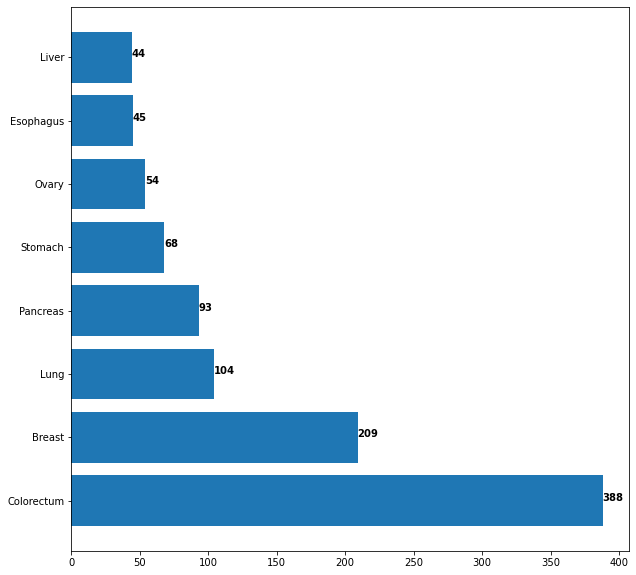

In [64]:
#using matplotlib to view the barplot to show the count of patient diagnosed with different types of cancer
a=dict(df1.Tumor_type.value_counts())
b=[]
c=[]
for key, value in a.items():
    c.append(value)
    b.append(key)
fig = plt.figure(figsize =(10,10))
plt.barh(b,c)
for index, value in enumerate(c):
    plt.text(value, index,
             str(value),fontweight = 'bold')
plt.show()

In [51]:
protein= df1[["AFP_(pg/ml)","CEA_(pg/ml)"]]
protein

,AFP_(pg/ml),CEA_(pg/ml)
0,1583.450,540.10
1,715.308,5902.40
2,4365.530,973.80
3,715.308,2027.50
4,801.300,614.50
...,...,...
1812,879.498,914.00
1813,1337.330,1179.50
1814,879.498,443.01
1815,879.498,443.01


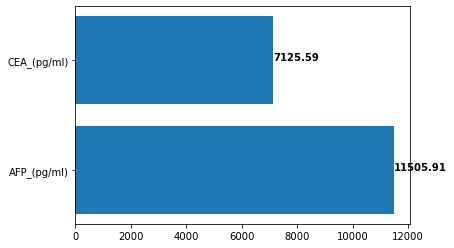

In [75]:
#barplot to view the mean concentration of each protein for the patients in the dataset
A=dict(protein.mean())
B=[]
C=[]
for key, value in A.items():
    C.append(value)
    B.append(key)

plt.barh(B,C)
for index, value in enumerate(C):
    a=round(value, 2)
    plt.text(a, index,
             str(a),fontweight = 'bold')
plt.show()

In [77]:
protein=df1[ ["CA-125_(U/ml)","CA19-9_(U/ml)"]]
protein

,CA-125_(U/ml),CA19-9_(U/ml)
0,5.090,16.452
1,7.270,40.910
2,4.854,16.452
3,5.390,16.452
4,4.854,16.452
...,...,...
1812,24.820,42.390
1813,5.580,16.440
1814,30.480,16.440
1815,1469.450,62.260


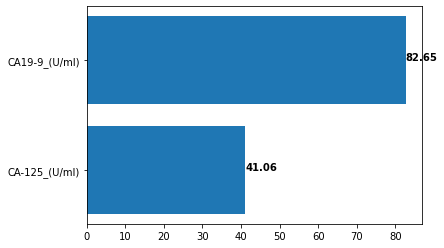

In [78]:
#barplot to view the mean concentration of each protein for the patients in the dataset

A=dict(protein.mean())
B=[]
C=[]
for key, value in A.items():
    C.append(value)
    B.append(key)
plt.barh(B,C)
for index, value in enumerate(C):
    a=round(value, 2)
    plt.text(a, index,
             str(a),fontweight = 'bold')
plt.show()

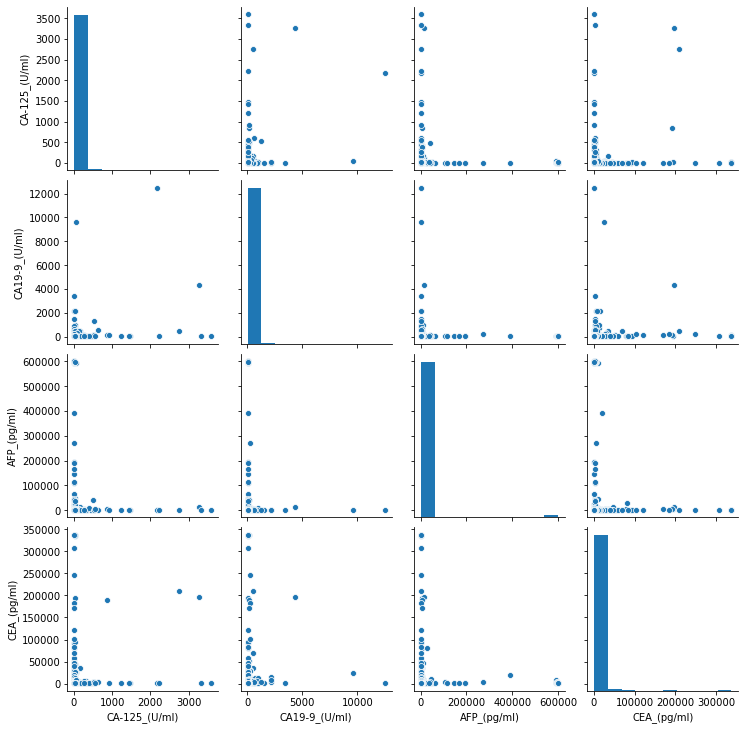

In [85]:
#pairplot to view the correlation of the four protein used using seaborn
protein=df1[["CA-125_(U/ml)","CA19-9_(U/ml)","AFP_(pg/ml)","CEA_(pg/ml)"]]
seaborn.pairplot(protein)
plt.show()

In [30]:
#in a new data frame add the afp protien where patients have concentration higher than the threshold limit
df2=df1[df1['AFP_(pg/ml)'] >= 21321]
df2.shape

(31, 11)

In [31]:
#in a new data frame add the ca125 protien where patients have concentration higher than the threshold limit

df3=df1[df1['CA-125_(U/ml)'] >= 577]
df3.shape

(12, 11)

In [32]:
#in a new data frame add the ca19-9 protien where patients have concentration higher than the threshold limit

df5=df1[df1['CA19-9_(U/ml)'] >= 92]
df5.shape

(94, 11)

In [33]:
#in a new data frame add the cea protien where patients have concentration higher than the threshold limit

df6=df1[df1['CEA_(pg/ml)'] >= 7507]
df6.shape

(98, 11)

In [34]:
#view the total count of 
df1['Tumor_type'].value_counts()

Colorectum    388
Breast        209
Lung          104
Pancreas       93
Stomach        68
Ovary          54
Esophagus      45
Liver          44
Name: Tumor_type, dtype: int64

# AFP

In [42]:
# splitting the data as test and train with size of 70-30 to train
x3= df2.iloc[:,1].values  
y3= df2.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

#feature scaling the data
st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

#Building Decision tree model to predict the tumour type
classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

#Finding the accuarcy of the model
print(metrics.accuracy_score(y3_test, y3_pred))
dec = metrics.accuracy_score(y3_test, y3_pred)
dot_data = StringIO()


a = dict(Counter(y3_pred))
print(a)

0.6
{'Stomach': 3, 'Liver': 7}


In [43]:
# splitting the data as test and train with size of 70-30 to train
x3= df2.iloc[:,1].values  
y3= df2.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

#feature scaling the data
st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

#Building Knn model to predict the tumour type
classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

#Finding the accuarcy of the model
print(metrics.accuracy_score(y3_test, y3_pred))
knn = metrics.accuracy_score(y3_test, y3_pred)
a = dict(Counter(y3_pred))
print(a)

0.7
{'Liver': 9, 'Stomach': 1}


# ca-125

In [62]:
# splitting the data as test and train with size of 70-30 to train
x3= df3.iloc[:,2].values  
y3= df3.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

#feature scaling the data
st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

#Building Decision tree model to predict the tumour type
classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

#Finding the accuarcy of the model
print(metrics.accuracy_score(y3_test, y3_pred))
dec1 = metrics.accuracy_score(y3_test, y3_pred)
dot_data = StringIO()
export_graphviz(classifier3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph2.write_png("ca-125.png")

a = dict(Counter(y3_pred))
print(a)

0.75
{'Ovary': 3, 'Liver': 1}


# ca19-9

In [63]:
# splitting the data as test and train with size of 70-30 to train
x3= df5.iloc[:,4].values  
y3= df5.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.3, random_state=0)

#feature scaling the data
st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

#Building Decision tree model to predict the tumour type
classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

#Finding the accuarcy of the model
print(metrics.accuracy_score(y3_test, y3_pred))
dec2 = metrics.accuracy_score(y3_test, y3_pred)
dot_data = StringIO()

a = dict(Counter(y3_pred))
print(a)

0.3103448275862069
{'Liver': 1, 'Pancreas': 11, 'Colorectum': 8, 'Stomach': 4, 'Breast': 3, 'Lung': 1, 'Esophagus': 1}


# Pancreas

In [64]:
# splitting the data as test and train with size of 70-30 to train
x3= df5.iloc[:,4].values  
y3= df5.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.4, random_state=0)

#feature scaling the data
st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

#Building Knn model to predict the tumour type
classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

#Finding the accuarcy of the model
y3_pred= classifier3.predict(x3_test) 

print(metrics.accuracy_score(y3_test, y3_pred))
knn2 = metrics.accuracy_score(y3_test, y3_pred)
a = dict(Counter(y3_pred))
print(a)

0.5
{'Colorectum': 15, 'Pancreas': 23}


# CEA

In [65]:
# splitting the data as test and train with size of 70-30 to train
x3= df6.iloc[:,5].values  
y3= df6.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.2, random_state=0)

#feature scaling the data
st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

#Building Decision tree model to predict the tumour type
classifier3= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier3.fit(x3_train, y3_train)


y3_pred= classifier3.predict(x3_test) 

#Finding the accuarcy of the model
print(metrics.accuracy_score(y3_test, y3_pred))
dec3 = metrics.accuracy_score(y3_test, y3_pred)
dot_data = StringIO()


a = dict(Counter(y3_pred))
print(a)

0.4
{'Colorectum': 8, 'Stomach': 1, 'Breast': 2, 'Lung': 3, 'Liver': 2, 'Pancreas': 3, 'Esophagus': 1}


# Colorectum

In [66]:
# splitting the data as test and train with size of 70-30 to train
x3= df6.iloc[:,5].values  
y3= df6.iloc[:,0].values

x3_train, x3_test, y3_train, y3_test= train_test_split(x3, y3, test_size= 0.2, random_state=0)

#feature scaling the data
st_x3= StandardScaler()  
x3_train= st_x3.fit_transform(x3_train.reshape(-1, 1))  
x3_test= st_x3.transform(x3_test.reshape(-1, 1))

#Building Knn model to predict the tumour type
classifier3= KNeighborsClassifier(n_neighbors=7)
classifier3.fit(x3_train, y3_train)

y3_pred= classifier3.predict(x3_test) 

#Finding the accuarcy of the model
print(metrics.accuracy_score(y3_test, y3_pred))
knn3 = metrics.accuracy_score(y3_test, y3_pred)
a = dict(Counter(y3_pred))
print(a)

0.55
{'Colorectum': 19, 'Lung': 1}


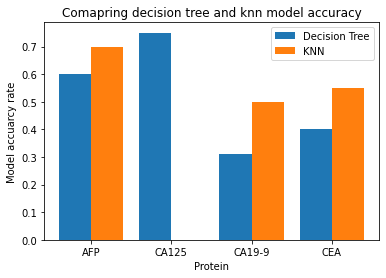

In [67]:
#comapring the accracy of decision tree and knn model for all 4 proteins
import numpy as np
import matplotlib.pyplot as plt

X = ['AFP','CA125','CA19-9','CEA']
dec = [dec,dec1,dec2,dec3]
knn = [knn,0,knn2,knn3]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, dec, 0.4, label = 'Decision Tree')
plt.bar(X_axis + 0.2, knn, 0.4, label = 'KNN')

plt.xticks(X_axis, X)
plt.xlabel("Protein")
plt.ylabel("Model accuarcy rate")
plt.title("Comapring decision tree and knn model accuracy")
plt.legend()
plt.show()
